In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = {
    'Points':['P1','P2','P3','P4','P5','P6','P7','P8'],
    'x_coordinate':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
    'y_coordinate':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}


In [ ]:
df = pd.DataFrame(dataset,columns=['Points','x_coordinate','y_coordinate'])
df

,Points,x_coordinate,y_coordinate
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30
5,P6,0.25,0.50
6,P7,0.24,0.10
7,P8,0.30,0.20


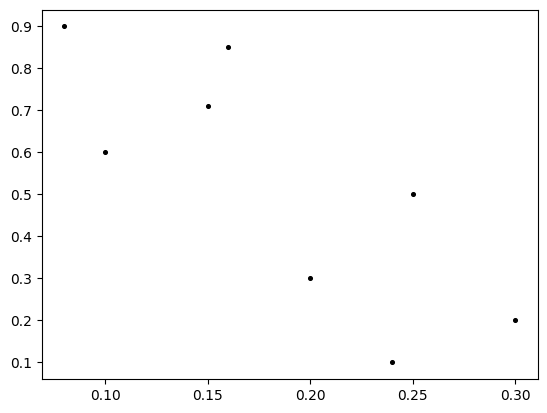

In [ ]:
# Getting the values and plotting it
f1 = df['x_coordinate'].values
f2 = df['y_coordinate'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
# Number of clusters
k = 2
# Two initial Centroids are given
# m1 = P1
# m2 = P8
Centroid_m1 = list(X[0])
Centroid_m2 = list(X[7])
Centroids = np.array([Centroid_m1,Centroid_m2])
print(Centroids)

[[0.1 0.6]
 [0.3 0.2]]


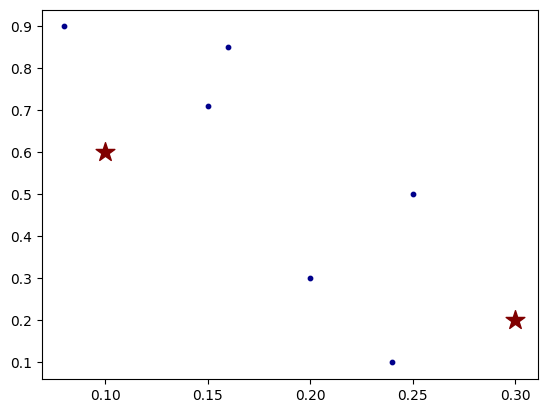

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, color='darkblue', s=10) # s =size
plt.scatter(Centroid_m1[0],Centroid_m1[1] ,marker='*', s=200, color='maroon')
plt.scatter(Centroid_m2[0],Centroid_m2[1] ,marker='*', s=200, color='maroon')

In [ ]:

C_old = np.zeros(Centroids.shape)  # To store the value of centroids when it updates

clusters = np.zeros(len(X))  # Cluster Lables(0, 1, 2)

error = dist(Centroids, C_old, None)  # Error func. - Distance between new centroids and old centroids

while error != 0:   # Loop will run till the error becomes zero
    
    for i in range(len(X)): # Assigning each value to its closest cluster
        distances = dist(X[i], Centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(Centroids)  # Storing the old centroid values
    print(C_old)
   
    for i in range(k):    #Finding the new centroids by taking the average value
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        Centroids[i] = np.mean(points, axis=0)
        print(Centroids[i])
    error = dist(Centroids, C_old, None)

[[0.1 0.6]
 [0.3 0.2]]
[0.148 0.712]
[0.24666667 0.2       ]
[[0.148      0.712     ]
 [0.24666667 0.2       ]]
[0.148 0.712]
[0.24666667 0.2       ]


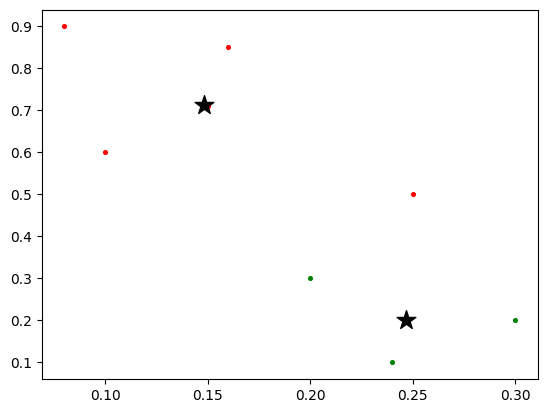

In [ ]:
colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(Centroids[:, 0], Centroids[:, 1], marker='*', s=200, c='#050505')